In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bitcoin.csv')
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [5]:
df.shape

(2713, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


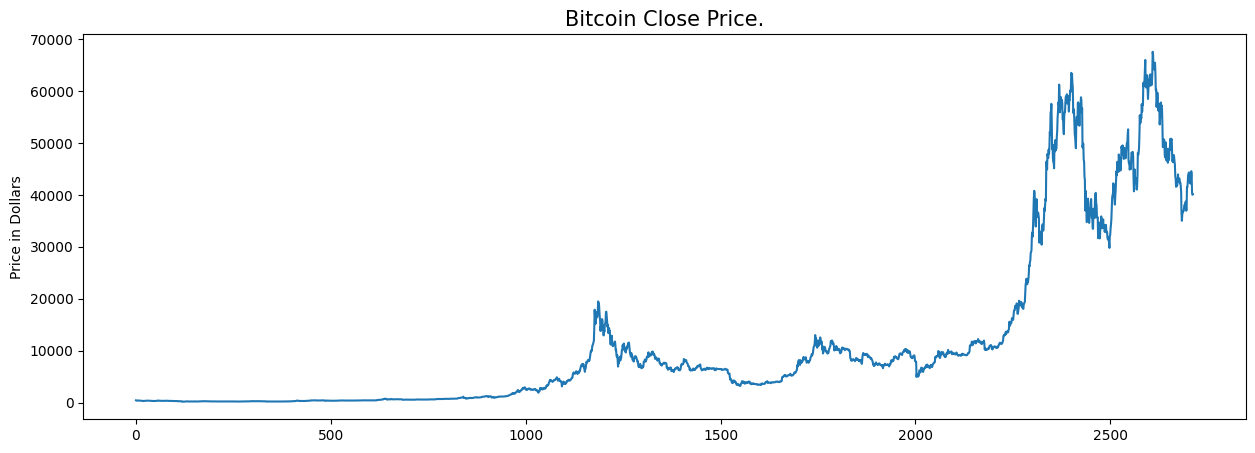

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close Price.', fontsize=15)
plt.ylabel('Price in Dollars')
plt.show()

In [9]:
df = df.drop(['Adj Close'], axis=1)
df.head(2)

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200


In [10]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

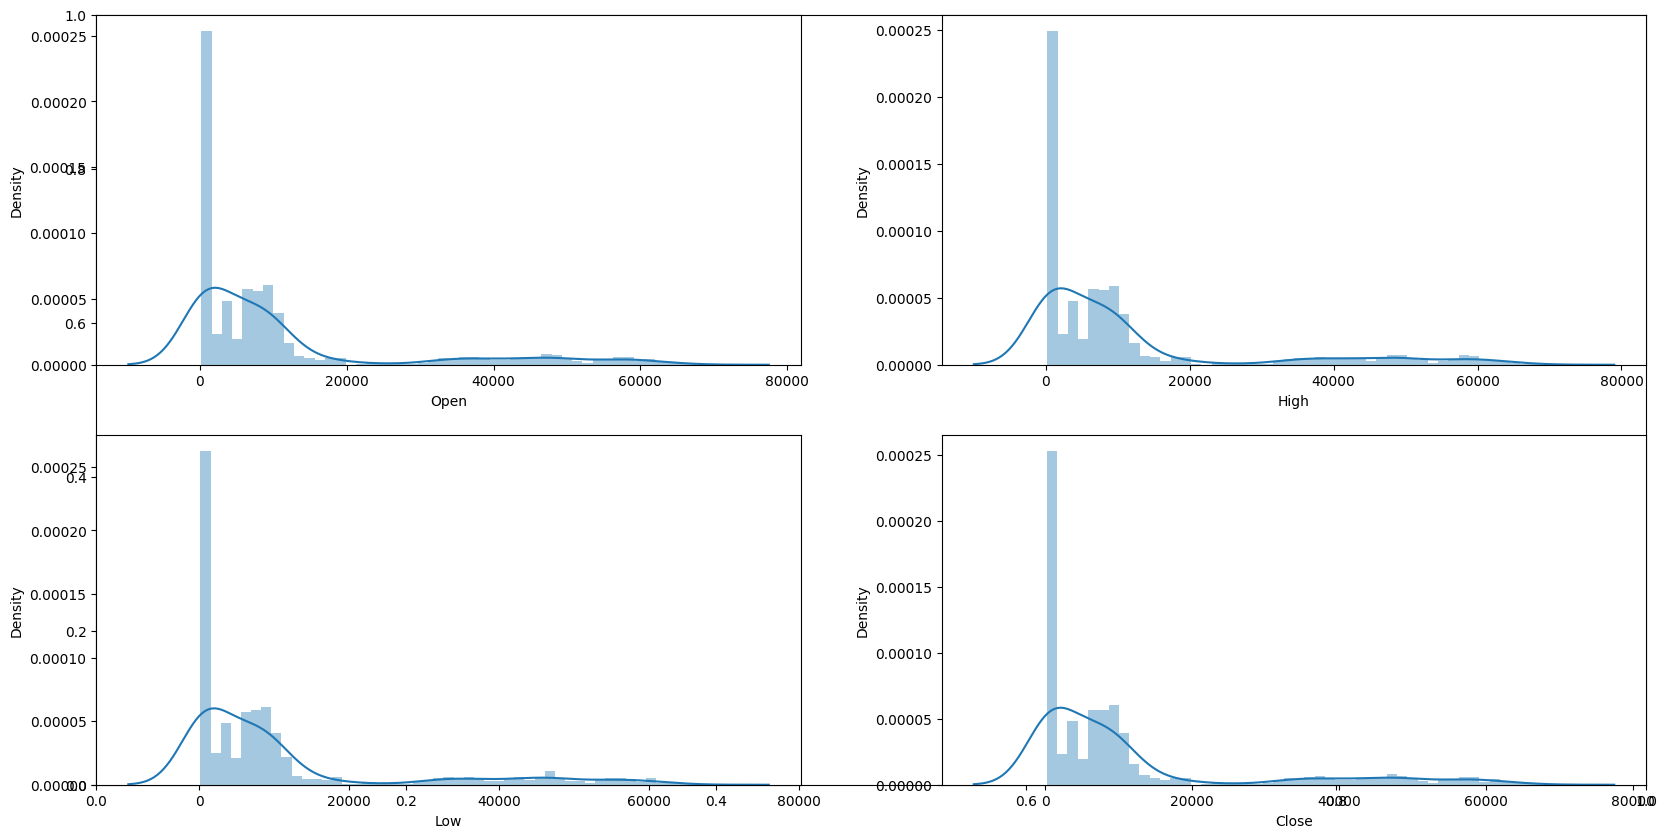

In [16]:
features = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.distplot(df[col])
plt.show()

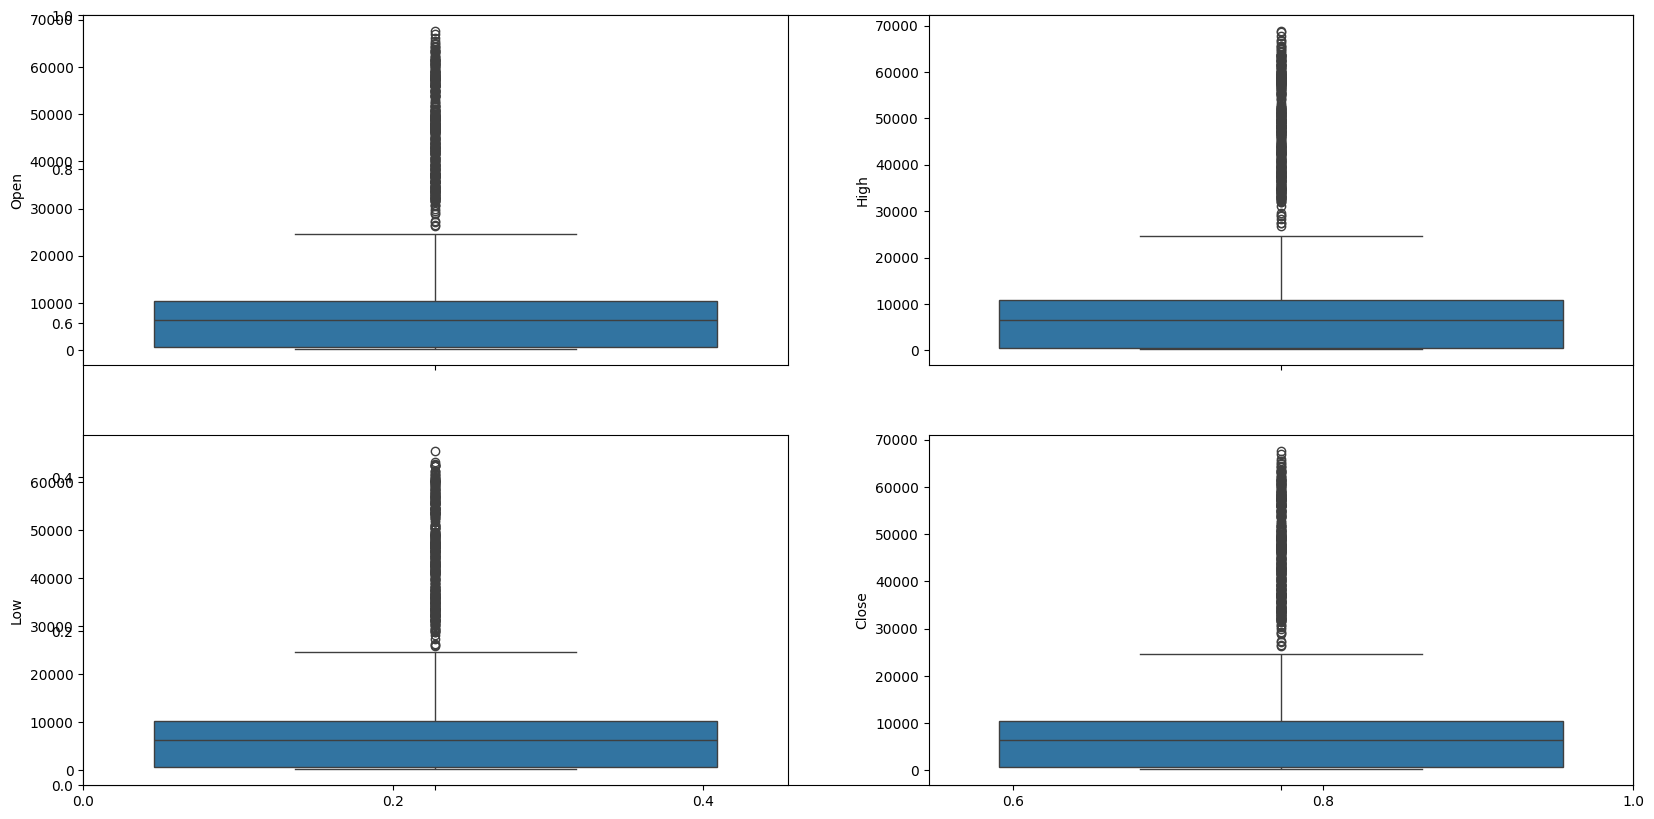

In [19]:
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(df[col])
plt.show()

### Feature Engineering

In [22]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
df.head(2)

,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2713 non-null   datetime64[ns]
 1   Open    2713 non-null   float64       
 2   High    2713 non-null   float64       
 3   Low     2713 non-null   float64       
 4   Close   2713 non-null   float64       
 5   Volume  2713 non-null   int64         
 6   year    2713 non-null   int32         
 7   month   2713 non-null   int32         
 8   day     2713 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1)
memory usage: 159.1 KB


In [26]:
data_grouped = df.groupby('year').mean()
data_grouped

,Open,High,Low,Close,Volume,month,day
year,,,,,,,
2014,365.058217,373.265397,355.903726,363.693085,2.383690e+07,10.735849,16.849057
2015,272.149011,278.151978,266.807891,272.453381,3.390557e+07,6.526027,15.720548
2016,567.141429,574.302273,560.453374,568.492407,8.592451e+07,6.513661,15.756831
2017,3970.644848,4144.687445,3811.707792,4006.033629,2.382867e+09,6.526027,15.720548
2018,7601.018680,7787.978969,7350.747939,7572.298947,6.063552e+09,6.526027,15.720548
2019,7385.218456,7549.907409,7222.602868,7395.246282,1.673049e+10,6.526027,15.720548
2020,11056.787201,11304.359035,10844.595163,11116.378092,3.302327e+10,6.513661,15.756831
2021,47402.115663,48762.998925,45852.003082,47436.932021,4.715574e+10,6.526027,15.720548
2022,41468.636797,42225.196172,40415.898360,41345.687735,2.718684e+10,1.380000,13.720000


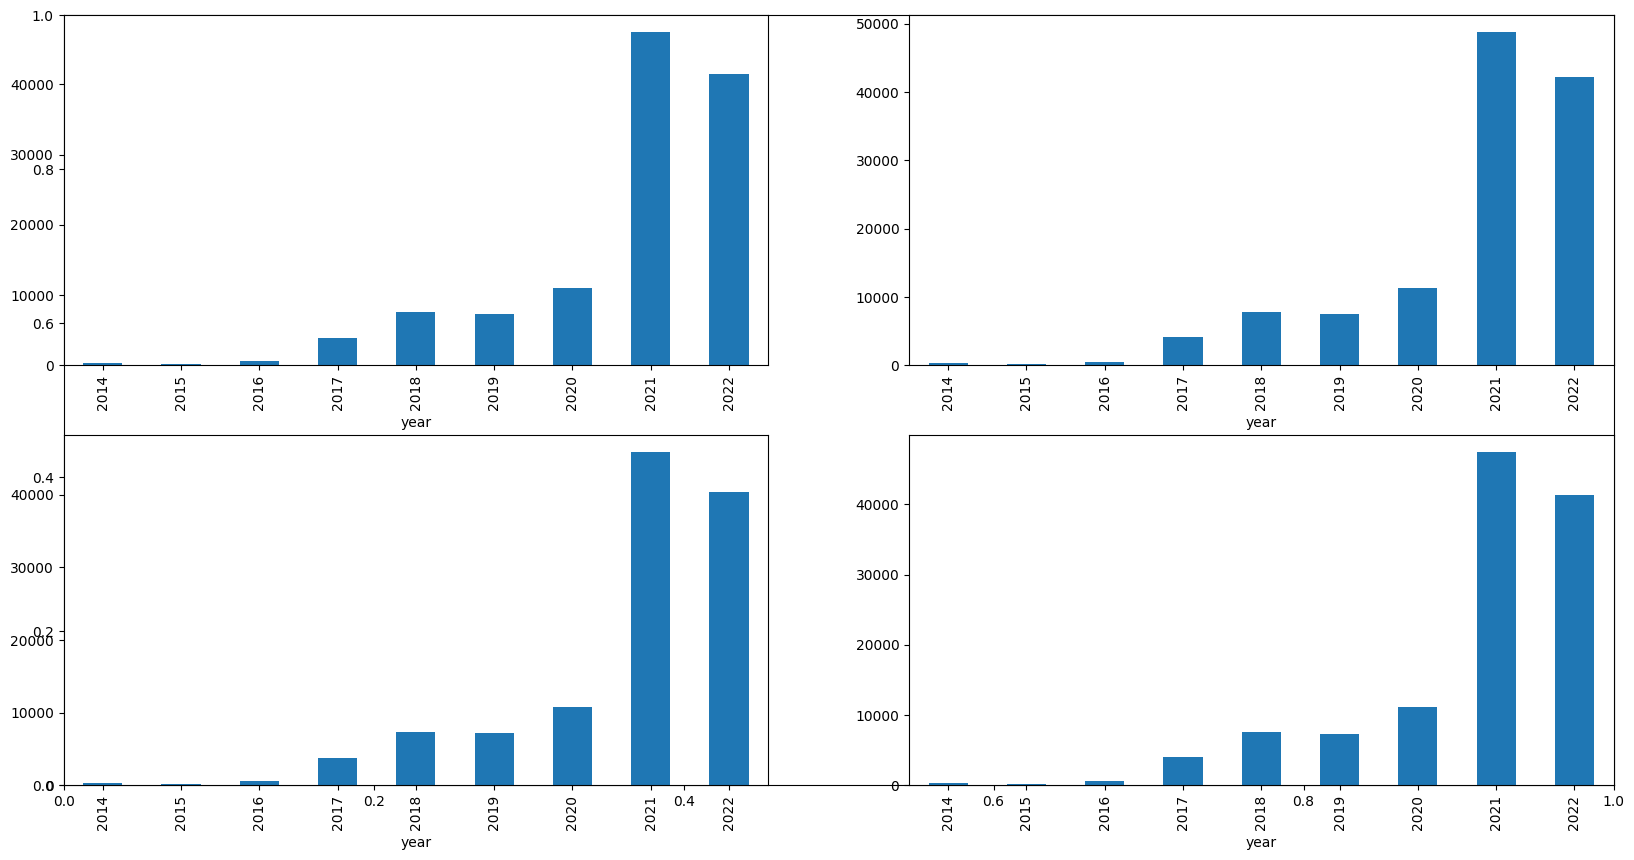

In [27]:
plt.subplots(figsize=(20, 10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i+1)
    data_grouped[col].plot.bar()
plt.show()

In [31]:
df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)
#df['month'] % 3 == 0: Checks whether the value in the month column is divisible by 3 (remainder equals 0).
#This identifies months like 3 (March), 6 (June), 9 (September), and 12 (December) — the last months of each quarter
df.head(2)

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1


In [34]:
#shift(-1): Moves the values upward by one row.
#The last value in the column becomes NaN because there is no subsequent value to shift into its place.
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df.head(4)

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end,open-close,low-high,target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1,8.529999,-15.752014,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1,32.419983,-43.755981,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1,29.307007,-43.302978,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1,-14.230988,-33.412994,0


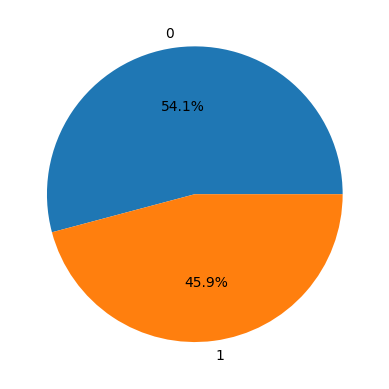

In [42]:
plt.pie(df['target'].value_counts(), labels=[0, 1], autopct='%1.1f%%')
plt.show()

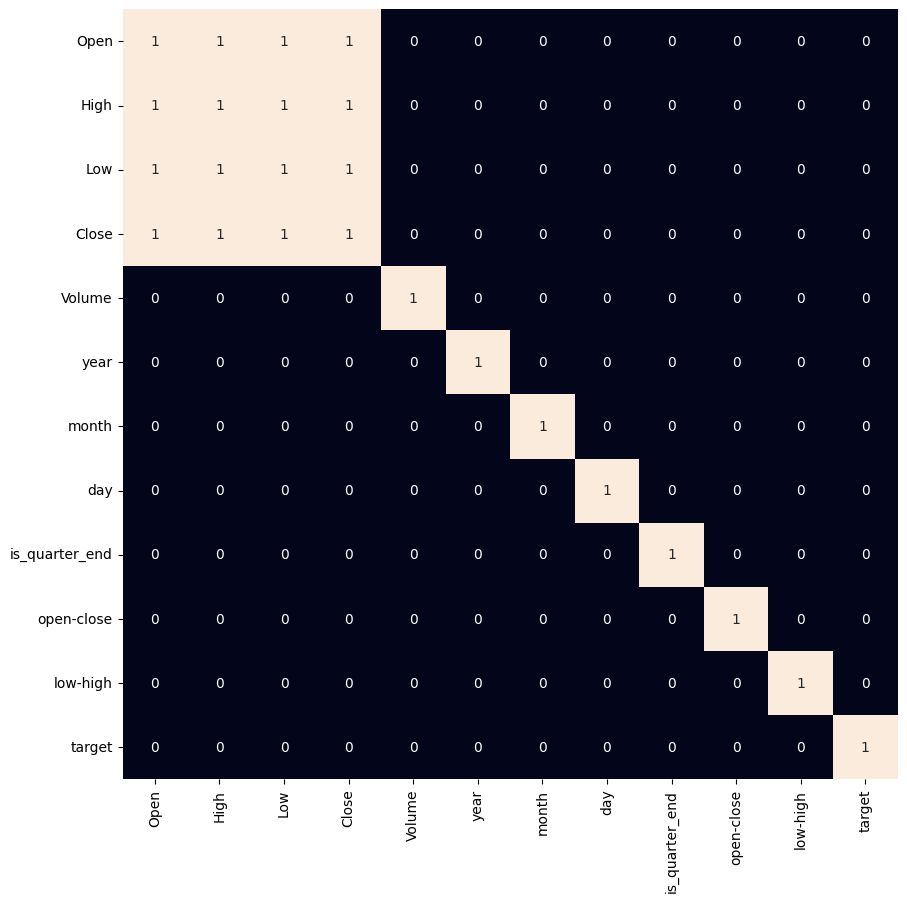

In [45]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr()>0.9, annot=True, cbar=False)
plt.show()

#### From the above heatmap, we can say that there is a high correlation between OHLC which is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

In [46]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)
X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)
print(X_train.shape)
print(X_valid.shape)

(2441, 3)
(272, 3)


### Model Development and Evaluation

In [52]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]
for i in range(3):
    models[i].fit(X_train, Y_train)
    print(f'{models[i]}: ')
    print("Training Accuracy: ", metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:, 1]))
    print("Validation Accuracy: ", metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:, 1]))
    print()

LogisticRegression(): 
Training Accuracy:  0.5272665077085648
Validation Accuracy:  0.5194460972575323

SVC(kernel='poly', probability=True): 
Training Accuracy:  0.4828745224483161
Validation Accuracy:  0.5278844593498134

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): 
Training Accurac

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

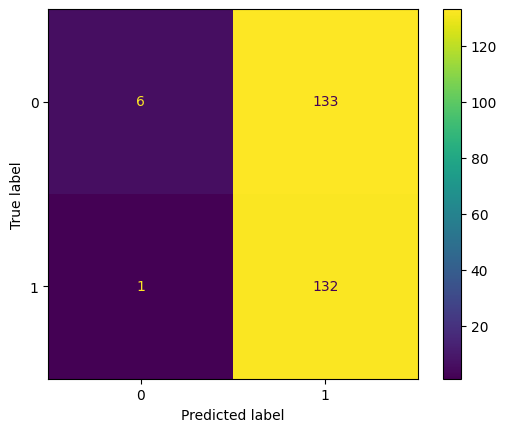

In [54]:
ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()